# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Muhammad Kamal Robbani
- Email: kamalrobbani88@gmail.com
- Id Dicoding: kkamall

## Menentukan Pertanyaan Bisnis

- Bagaimana trend dari rental sepeda dalam beberapa bulan terakhir?
- Musim apa yang memiliki total rental sepeda paling tinggi diantara musim lainnya?
- Bagaiamana distribusi total rental sepeda berdasarkan temperature?

## Menyiapkan semua library yang dibuthkan

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [68]:
day_df = pd.read_csv('day.csv')
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**[ Mengecek tipe data setiap kolom ]**
- Tipe data pada kolom '**dteday**' belum dalam bentuk tipe data **date**.

In [69]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**[ Mengecek *missing value* ]**
- Tidak terdapat ***missing value*** pada setiap kolom.

In [70]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**[ Mengecek *duplicate data* ]**
- Tidak terdapat **data duplikat**.

In [71]:
day_df.duplicated().sum()

0

**[ Mengecek *Outlier* ]**
- Data terlihat normal, tidak terdapat outlier.

In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Mengubah kolom tipe data 'dteday' menjadi tipe data **date**

In [73]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [74]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Menambahkan kolom baru "**season_name**", berisi nama season untuk kejelasan pelabelan saat visualisasi

In [75]:
season_mapping = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
day_df['season_name'] = day_df['season'].map(season_mapping)

In [76]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter


Menambahkan kolom baru "**workingday_status**", berisi status hari, entah itu workday atau dayoff, untuk kejelasan pelabelan saat visualisasi

In [77]:
workingday_mapping = {0:'Day-off', 1:'Workday'}
day_df['workingday_status'] = day_df['workingday'].map(workingday_mapping)

In [78]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,workingday_status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Day-off
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter,Day-off
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter,Workday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter,Workday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter,Workday


Menambahkan kolom baru "**holiday_status**", berisi status holiday, entah holiday atau non-holiday, untuk kejelasan pelabelan saat visualisasi

In [79]:
holiday_mapping = {0:'Non-holiday', 1:'Holiday'}
day_df['holiday_status'] = day_df['holiday'].map(holiday_mapping)

In [80]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,workingday_status,holiday_status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Day-off,Non-holiday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter,Day-off,Non-holiday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter,Workday,Non-holiday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter,Workday,Non-holiday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter,Workday,Non-holiday


Denormalisasi temperature

In [81]:
day_df['temp_actual'] = day_df['temp'] * (39 + 8) - 8

In [82]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,workingday_status,holiday_status,temp_actual
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter,Day-off,Non-holiday,8.175849
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter,Day-off,Non-holiday,9.083466
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter,Workday,Non-holiday,1.229108
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter,Workday,Non-holiday,1.400000
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter,Workday,Non-holiday,2.666979


Grouping temperature dengan kriteria sebagai berikut:
- Very Cold: < 0°C
- Cold: 0-10°C
- Normal: 10-25°C
- Warm: 25-30°C
- Very Hot: > 30°C

In [83]:
def categorize_temperature(temp):
    if temp <= 0:
        return 'Very Cold'
    elif 0 < temp <= 10:
        return 'Cold'
    elif 10 < temp <= 25:
        return 'Normal'
    elif 25 < temp <= 30:
        return 'Warm'
    elif temp > 30:
        return 'Very Hot'

day_df['temp_group'] = day_df['temp_actual'].apply(categorize_temperature)
day_df['temp_group'] = pd.Categorical(day_df['temp_group'], ["Very Cold", "Cold", "Normal", "Warm", "Very Hot"])

In [84]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_name,workingday_status,holiday_status,temp_actual,temp_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Winter,Day-off,Non-holiday,8.175849,Cold
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Winter,Day-off,Non-holiday,9.083466,Cold
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Winter,Workday,Non-holiday,1.229108,Cold
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Winter,Workday,Non-holiday,1.400000,Cold
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Winter,Workday,Non-holiday,2.666979,Cold


## Exploratory Data Analysis (EDA)

### Explore ...

Melakukan correlation analysis.
- **Tidak terdapat** variabel (secara individual) yang memiliki **korelasi yang kuat** terhadap **total rental sepeda** (**'casual', 'registered', 'cnt'**).
- Terdapat **korelasi positif** (berbanding lurus) yang **bersifat sedang** antara **musim rental/'season'** dengan **total rental sepeda secara keseluruhan/'cnt'** (**0.41**) dan **total rental sepeda yang dilakukan oleh user yang sudah registrasi/'registered'** (**0.41**).
- Terdapat **korelasi positif** (berbanding lurus) yang **bersifat sedang** antara **tahun rental/'yr'** dengan **total rental sepeda secara keseluruhan/'cnt'** (**0.57**) dan **total rental sepeda yang dilakukan oleh user yang sudah registrasi/'registered'** (**0.6**).
- Terdapat **korelasi negatif** (berbanding terbalik) yang **bersifat sedang** antara **status hari kerja/'workingday'** dengan **total rental sepeda yang dilakukan oleh user yang belum registrasi/'casual'** (**-0.52**).
- Terdapat **korelasi positif** (berbanding lurus) yang **bersifat sedang** antara **temperature/'temp'** dengan **total rental sepeda secara keseluruhan/'cnt'** (**0.63**), **total rental sepeda yang dilakukan oleh user yang sudah registrasi/'registered'** (**0.54**), dan **total rental sepeda yang dilakukan oleh user yang belum registrasi/'casual'** (**-0.54**).
- Terdapat **korelasi positif** (berbanding lurus) yang **bersifat sedang** antara **feeling temperature/'atemp'** dengan **total rental sepeda secara keseluruhan/'cnt'** (**0.63**), **total rental sepeda yang dilakukan oleh user yang sudah registrasi/'registered'** (**0.54**), dan **total rental sepeda yang dilakukan oleh user yang belum registrasi/'casual'** (**-0.54**).

In [85]:
day_df.corr()

<ipython-input-85-2760edc27d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_actual
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830,0.150580
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,0.334315
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,0.047604
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,0.220205
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,-0.028556
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,-0.000170
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,0.052660
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.120602
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,1.000000
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.991702


Melihat distribusi total rental sepeda pada setiap kategori temperatur.
- **Kategori temperatur** dengan **total rental sepeda terbanyak** terdapat pada katagori ***Normal (10-25°C)*** dengan total rental sepeda sebesar **1.879.107**.
- **Kategori temperatur** dengan **total rental sepeda tersedikit** terdapat pada kategori ***Very Cold (< 0°C)*** dengan total rental sepeda sebesar **24.139**.

In [86]:
by_temp_df = day_df.groupby('temp_group').cnt.sum().reset_index()
by_temp_df.rename(columns={
    'cnt': 'Total Rental'
}, inplace=True)
by_temp_df

,temp_group,Total Rental
0,Very Cold,24139
1,Cold,670090
2,Normal,1879107
3,Warm,661695
4,Very Hot,57648


Melihat distribusi total rental sepeda pada setiap musimnya.
- **Musim** dengan **total rental sepeda terbanyak** terdapat pada musim ***Summer*** dengan total rental sepeda sebesar **1.061.129**.
- **Musim** dengan **total rental sepeda tersedikit** terdapat pada musim ***Winter*** dengan total rental sepeda sebesar **471.348**.

In [87]:
by_season_df = day_df.groupby('season_name').cnt.sum().reset_index()
by_season_df.rename(columns={
    'cnt': 'Total Rental'
}, inplace=True)
by_season_df

,season_name,Total Rental
0,Fall,841613
1,Spring,918589
2,Summer,1061129
3,Winter,471348


## Visualization & Explanatory Analysis

### Bagaimana trend dari rental sepeda dalam beberapa bulan terakhir?
- Terdapat **peningkatan total rental sepeda** yang **signifikan** dari bulan **Februari** ke bulan **Maret**.
- Dari bulan **Januari** (**96.744**) hingga bulan **September** (**218.573**) total rental sepeda terus mengalami **peningkatan/uptrend**.
- Dari bulan **September** (**218.573**) hingga bulan **Desember** (**123.713**) total rental sepeda terus mengalami **penurunan/downtred** secara **signifikan**.

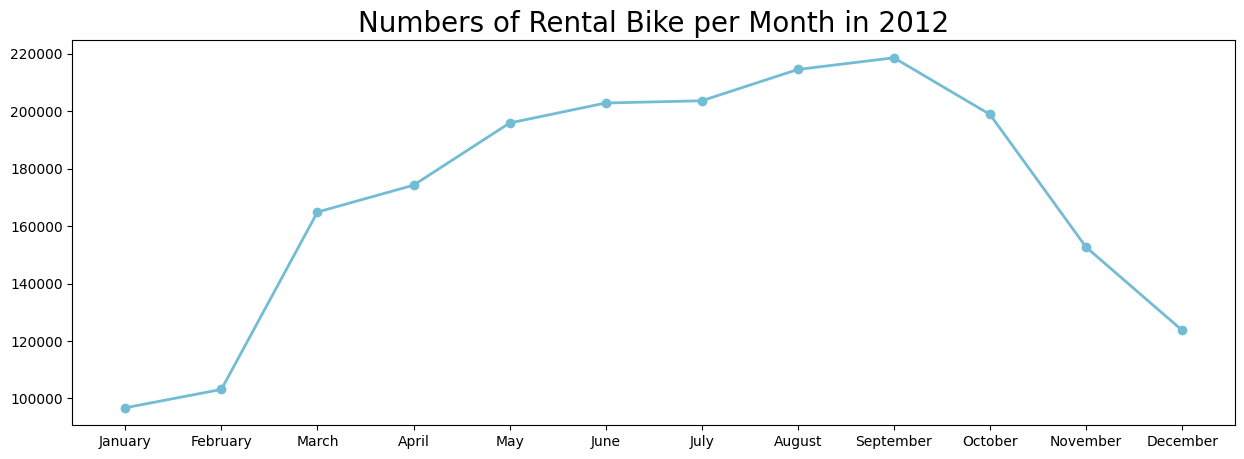

In [88]:
# Menyiapkan dataset (rental sepeda per-bulan tahun 2012)
monthly_rental_bike = day_df[(day_df['yr'] == 1)].resample(rule='M', on='dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
})
monthly_rental_bike.index = monthly_rental_bike.index.strftime('%B')
monthly_rental_bike = monthly_rental_bike.reset_index()
monthly_rental_bike.rename(columns={
    'casual': 'Total Rental Bike by Casual User',
    'registered': 'Total Rental Bike by Registered User',
    'cnt': 'Total Rental Bike',
    'dteday': 'month'
}, inplace=True)

# Visualisasi data
plt.figure(figsize=(15,5))
plt.plot(monthly_rental_bike['month'], monthly_rental_bike['Total Rental Bike'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Numbers of Rental Bike per Month in 2012", loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Musim apa yang memiliki total rental paling tinggi diantara musim lainnya?
- **Musim** dengan **total rental sepeda paling banyak** terdapat pada musim **Summer** (**1.061.129**).
- **Musim** dengan **total rental sepeda paling sedikit** terdapat pada musim **Winter** (**471.348**).

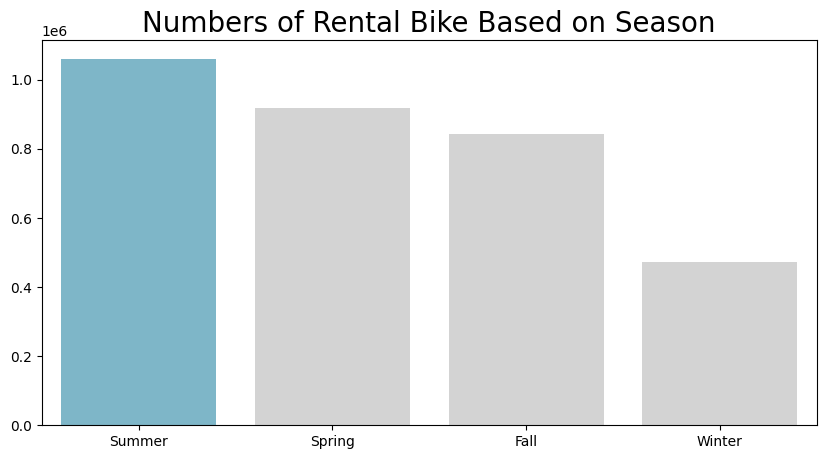

In [89]:
# Warna barchart
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Visualisasi data
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='season_name', y='Total Rental', data=by_season_df.sort_values(by='Total Rental', ascending=False), palette=colors, ax=ax, errorbar=None)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Numbers of Rental Bike Based on Season', loc='center', fontsize=20)
plt.show()

### Bagaiamana distribusi total rental berdasarkan temperature?
- Kategori temperatur **"Normal" (10-25°C)** memiliki **total rental sepeda terbanyak** (**1.879.107**).
- Kategori temperatur **"Very Cold" (< 0°C)** memiliki **total rental sepeda paling sedikit** (**24.139**).

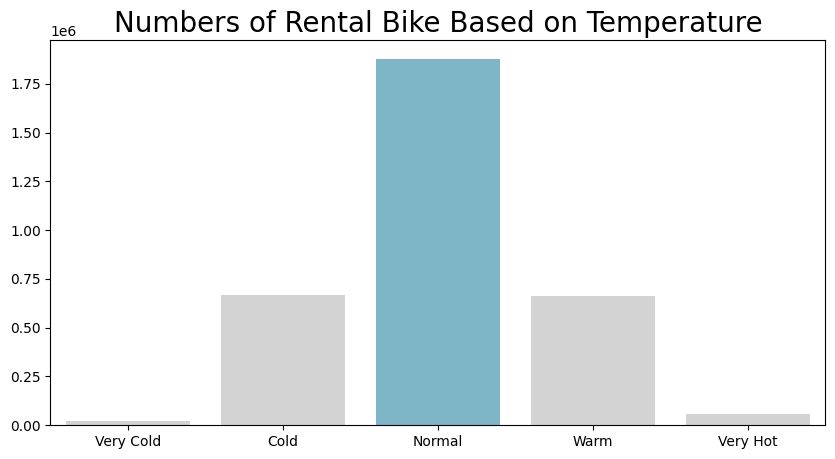

In [90]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='temp_group', y='Total Rental', data=by_temp_df.sort_values(by='temp_group', ascending=True), palette=colors, ax=ax, errorbar=None)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Numbers of Rental Bike Based on Temperature', loc='center', fontsize=20)
plt.show()

## Conclusion

**Bagaimana trend dari rental sepeda dalam beberapa bulan terakhir?**
- **Trend rental sepeda mengalami kenaikan** yang signifikan dari mulai bulan **Januari** hingga bulan **September**, namun setelahnya yaitu dalam range bulan **September** hingga bulan **Desember** terus **mengalami penurunan** secara signifikan.

**Musim apa yang memiliki total rental paling tinggi diantara musim lainnya?**
- Insight pada pertanyaan sebelumnya dapat **divalidasi** oleh **perbandingan total rental sepeda berdasarkan musim** yang tertera pada **bar chart** yang sebelumnya ditampilkan, yang mana **musim dengan total rental sepeda paling tinggi** berada pada **musim Summer (Juni - September)** dan **musim dengan total rental sepeda paling sedikit** berada pada **musim Winter (December - Maret)**.

In [91]:
day_df[['season_name', 'dteday']][(day_df['yr'] == 1) & (day_df['season_name'] == 'Summer')].sort_values(by='dteday', ascending=True)

,season_name,dteday
537,Summer,2012-06-21
538,Summer,2012-06-22
539,Summer,2012-06-23
540,Summer,2012-06-24
541,Summer,2012-06-25
...,...,...
626,Summer,2012-09-18
627,Summer,2012-09-19
628,Summer,2012-09-20
629,Summer,2012-09-21


In [92]:
day_df[['season_name', 'dteday']][(day_df['yr'] == 1) & (day_df['season_name'] == 'Winter')].sort_values(by='dteday', ascending=True)

,season_name,dteday
365,Winter,2012-01-01
366,Winter,2012-01-02
367,Winter,2012-01-03
368,Winter,2012-01-04
369,Winter,2012-01-05
...,...,...
726,Winter,2012-12-27
727,Winter,2012-12-28
728,Winter,2012-12-29
729,Winter,2012-12-30


**Bagaiamana distribusi total rental berdasarkan temperature?**
- Semua insight-insgiht yang didapatkan sebelumnya juga dapat divalidasi kembali oleh **perbandingan total rental sepeda berdasarkan temperatur** yang tertera pada **bar chart** yang sebelumnya ditampilkan, yang mana **2 musim dengan total rental tertinggi**, yaitu musim ***Summer*** dan musim ***Spring*** memiliki **rata-rata suhu temperatur massuk pada kelompok *Normal***, dengan musim ***Summer*** memiliki rata-rata temperatur **25°C** dan musim ***Spring*** memiliki rata-rata temperatur **18°C**. Hal ini juga menjelaskan mengapa musim ***Winter*** memiliki **total rental sepeda paling sedikit**, karena pada musim ***Winter*** rata-rata temperatur berada pada kelompok ***Cold*** atau ***Very Cold***.

In [93]:
day_df.groupby('season_name').temp_actual.mean()

season_name
Fall      11.876584
Spring    17.587042
Summer    25.196538
Winter     5.994135
Name: temp_actual, dtype: float64

## Export Dataset

In [94]:
day_df.to_csv('day_df.csv', index=False)